# Лабораторная работа №5
Баранов Владимир ШАД-311

**Задания:** Изучить свойства автокорреляции для временных рядов (массивы passengers, births, а также синусоида sin(x)), освоить вычисление функции автокорреляции (ACF) «вручную» и с использованием библиотеки statsmodels, а также повторно провести проверку ряда на стационарность с помощью расширенного теста Дики–Фуллера (ADF-теста)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [2]:
plt.style.use("seaborn-v0_8")

In [3]:
passengers_df = pd.read_csv("/Users/vladimirbaranov/Downloads/passengers.csv", parse_dates=[0])
passengers_df.set_index(passengers_df.columns[0], inplace=True)

passengers_series = passengers_df.iloc[:, 0]

print("Информация о временном ряду passengers:")
print(passengers_df.head(), "\n")
print(f"Число наблюдений в ряду passengers: {passengers_series.shape[0]}")

births_df = pd.read_csv("/Users/vladimirbaranov/Downloads/births.csv", parse_dates=["Date"])
births_df.set_index("Date", inplace=True)

births_series = births_df["Births"]

print("\nИнформация о временном ряду births:")
print(births_df.head(), "\n")
print(f"Число наблюдений в ряду births: {births_series.shape[0]}")

Информация о временном ряду passengers:
            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121 

Число наблюдений в ряду passengers: 144

Информация о временном ряду births:
            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44 

Число наблюдений в ряду births: 365


In [4]:
def compute_acf(series: pd.Series, max_lag: int) -> pd.Series:
    clean_series = series.dropna()
    mu = clean_series.mean()
    centered = clean_series - mu

    denom = (centered ** 2).sum()

    lags = list(range(max_lag + 1))
    acf_vals = []

    for k in lags:
        # сдвигаем ряд на k шагов назад
        shifted = clean_series.shift(k) - mu
        num = (centered * shifted).dropna().sum()
        acf_vals.append(num / denom)

    return pd.Series(acf_vals, index=lags)

## Задание 1

Ручной расчёт ACF для временного ряда passengers:
0    1.000000
1    0.948047
2    0.875575
3    0.806681
4    0.752625
5    0.713770
6    0.681734
7    0.662904
8    0.655610
9    0.670948
dtype: float64



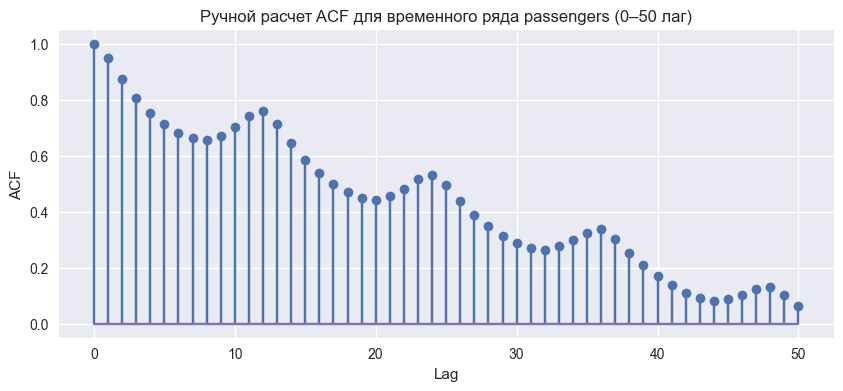

In [6]:
# Максимальный лаг для анализа ACF
max_lag_passengers = 50

# Ручной расчёт ACF для ряда passengers
acf_passengers_manual = compute_acf(passengers_series, max_lag_passengers)

print("Ручной расчёт ACF для временного ряда passengers:")
print(acf_passengers_manual.iloc[:10])  # первые 10 значений
print()

plt.figure(figsize=(10, 4))
plt.stem(
    acf_passengers_manual.index,
    acf_passengers_manual.values
)
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.title("Ручной расчет ACF для временного ряда passengers (0–50 лаг)")
plt.grid(True)
plt.show()

## Задание 2

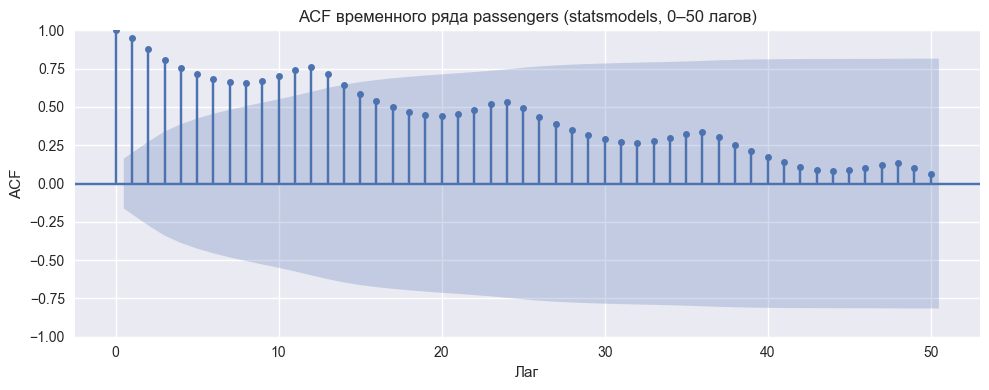

In [8]:
# ACF с помощью plot_acf из statsmodels
fig, ax = plt.subplots(figsize=(10, 4))

plot_acf(
    passengers_series,
    lags=range(0, 51),
    ax=ax
)

ax.set_title("ACF временного ряда passengers (statsmodels, 0–50 лагов)")
ax.set_xlabel("Лаг")
ax.set_ylabel("ACF")

plt.tight_layout()
plt.show()

## Задание 3

Ручной расчёт ACF для временного ряда births (первые 10 лагов):
0    1.000000
1    0.217241
2    0.152878
3    0.108213
4    0.090661
5    0.095955
6    0.091040
7    0.195081
8    0.141153
9    0.061179
dtype: float64



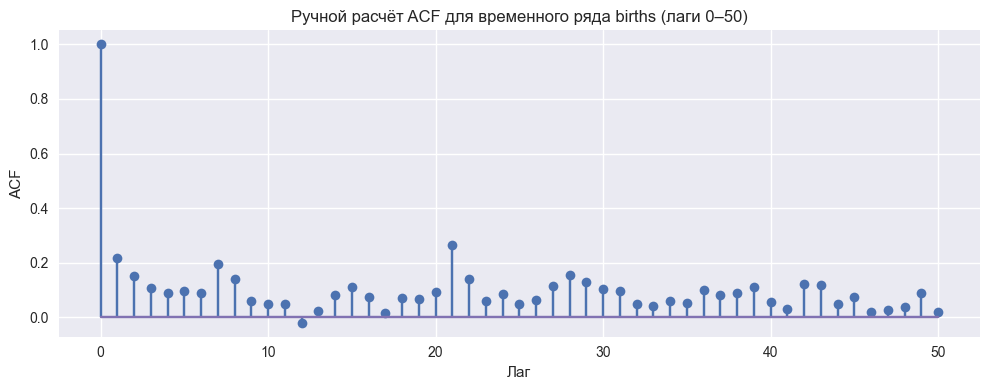

In [11]:
# Максимальный лаг для ряда births
max_lag_births = 50

# Ручной расчёт ACF для временного ряда births
acf_births_manual = compute_acf(births_series, max_lag_births)

print("Ручной расчёт ACF для временного ряда births (первые 10 лагов):")
print(acf_births_manual.iloc[:10])
print()

# Визуализация автокорреляционной функции для births
fig, ax = plt.subplots(figsize=(10, 4))

markerline, stemlines, baseline = ax.stem(
    acf_births_manual.index,
    acf_births_manual.values,
)

ax.set_xlabel("Лаг")
ax.set_ylabel("ACF")
ax.set_title("Ручной расчёт ACF для временного ряда births (лаги 0–50)")
ax.grid(True)

plt.tight_layout()
plt.show()

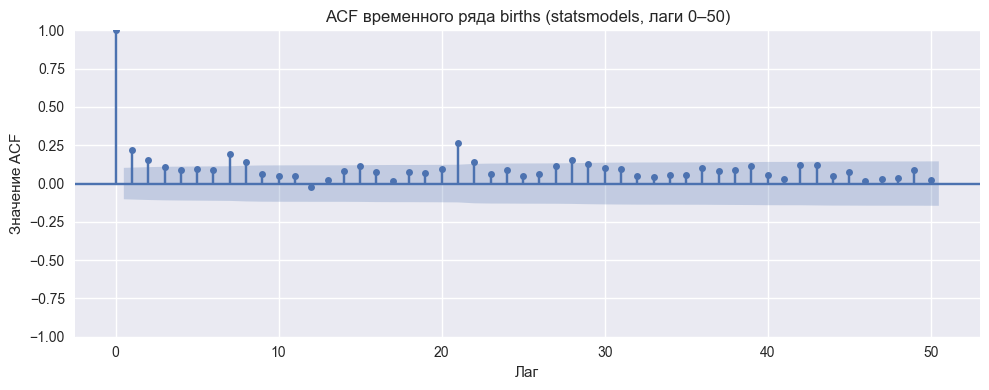

In [14]:
fig, ax = plt.subplots(figsize=(10, 4))

plot_acf(
    births_series,      # временной ряд
    lags=range(0, 51),  # лаги от 0 до 50
    ax=ax
)

ax.set_title("ACF временного ряда births (statsmodels, лаги 0–50)")
ax.set_xlabel("Лаг")
ax.set_ylabel("Значение ACF")

plt.tight_layout()
plt.show()

## Задание 4

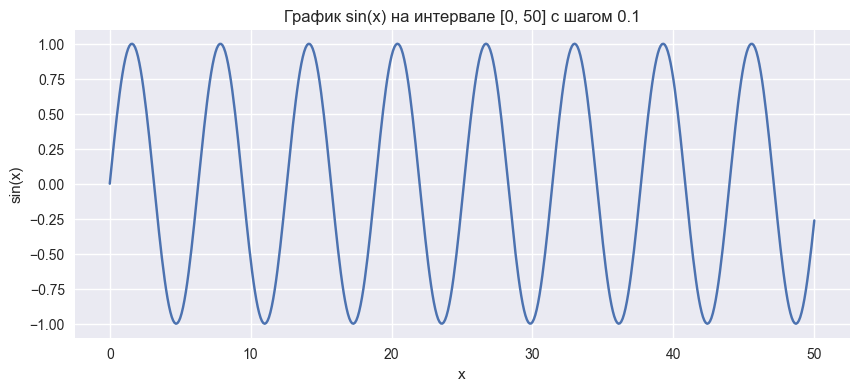

Ручной расчёт ACF для sin(x), первые 15 лагов:
0     1.000000
1     0.994918
2     0.979934
3     0.955238
4     0.921116
5     0.877944
6     0.826191
7     0.766407
8     0.699221
9     0.625334
10    0.545510
11    0.460570
12    0.371382
13    0.278853
14    0.183921
dtype: float64


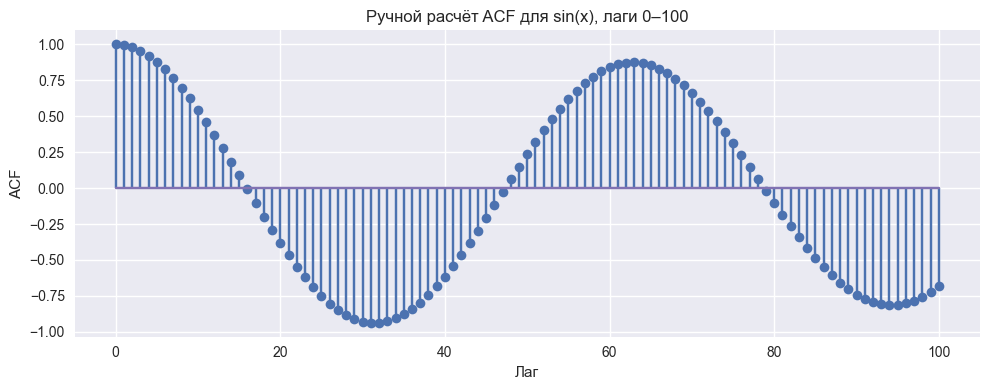

In [15]:
x_grid = np.arange(0.0, 50.0 + 0.1, 0.1)
sin_values = np.sin(x_grid)

sin_series = pd.Series(data=sin_values, index=x_grid)

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x_grid, sin_values)
ax.set_xlabel("x")
ax.set_ylabel("sin(x)")
ax.set_title("График sin(x) на интервале [0, 50] с шагом 0.1")
ax.grid(True)
plt.show()

# Ручной расчёт ACF для синусоиды
max_lag_sin = 100
acf_sin_manual = compute_acf(sin_series, max_lag_sin)

print("Ручной расчёт ACF для sin(x), первые 15 лагов:")
print(acf_sin_manual.iloc[:15])

fig, ax = plt.subplots(figsize=(10, 4))
markerline, stemlines, baseline = ax.stem(
    acf_sin_manual.index,
    acf_sin_manual.values,
)

ax.set_xlabel("Лаг")
ax.set_ylabel("ACF")
ax.set_title("Ручной расчёт ACF для sin(x), лаги 0–100")
ax.grid(True)

plt.tight_layout()
plt.show()

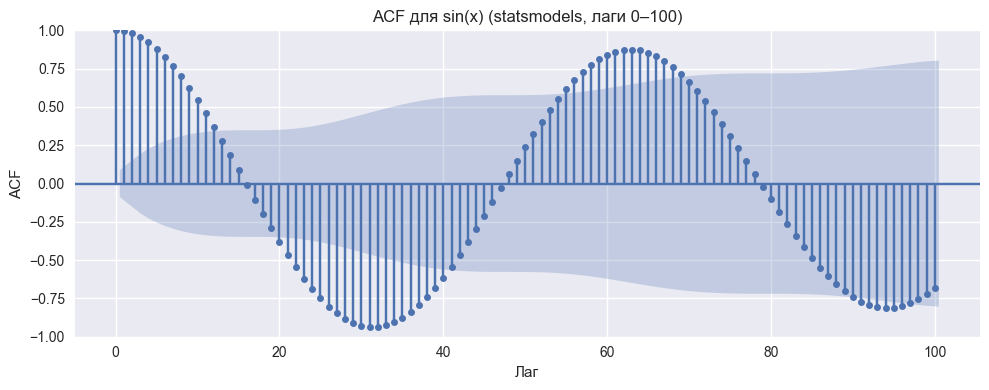

In [16]:
fig, ax = plt.subplots(figsize=(10, 4))

plot_acf(
    sin_series,        # временной ряд sin(x)
    lags=range(0, 101),
    ax=ax
)

ax.set_title("ACF для sin(x) (statsmodels, лаги 0–100)")
ax.set_xlabel("Лаг")
ax.set_ylabel("ACF")

plt.tight_layout()
plt.show()

## Задание 5

In [17]:
# Тест Дики–Фуллера для временного ряда births

adf_res = adfuller(births_series.dropna())

adf_statistic, p_val, lag_count, n_obs, crit_vals, *_ = adf_res

print("Результаты ADF-теста (Дики–Фуллера) для временного ряда births:")
print(f"  ADF-статистика: {adf_statistic:.4f}")
print(f"  p-value:        {p_val:.4f}")
print(f"  Число лагов:    {lag_count}")
print(f"  Число наблюдений в выборке: {n_obs}")
print("  Критические значения теста:")
for level, cv in crit_vals.items():
    print(f"    уровень {level}: {cv:.4f}")

if p_val < 0.05:
    print("\nИнтерпретация: p-value < 0.05, отклоняем нулевую гипотезу о наличии единичного корня.")
    print("Заключение: временной ряд births можно считать стационарным при уровне значимости 5%.")
else:
    print("\nИнтерпретация: p-value >= 0.05, недостаточно оснований отвергнуть нулевую гипотезу.")
    print("Заключение: временной ряд births не является стационарным при уровне значимости 5%.")

Результаты ADF-теста (Дики–Фуллера) для временного ряда births:
  ADF-статистика: -4.8083
  p-value:        0.0001
  Число лагов:    6
  Число наблюдений в выборке: 358
  Критические значения теста:
    уровень 1%: -3.4487
    уровень 5%: -2.8696
    уровень 10%: -2.5711

Интерпретация: p-value < 0.05, отклоняем нулевую гипотезу о наличии единичного корня.
Заключение: временной ряд births можно считать стационарным при уровне значимости 5%.


## Заключение и выводы

- Для временного ряда *passengers* была вручную вычислена автокорреляционная функция на лагах от 1 до 50 и построен её график. По форме ACF хорошо видна ярко выраженная сезонность и медленное убывание значений автокорреляции с ростом лага.

- При расчёте ACF для *passengers* с помощью функции `plot_acf` из библиотеки `statsmodels` получен график, который по структуре полностью согласуется с результатами ручного вычисления.

- Для временного ряда *births* выполнен аналогичный анализ: автокорреляция найдена как вручную, так и с использованием библиотечной функции. Формы ACF практически совпадают, при этом спад автокорреляции происходит заметно быстрее, чем в случае ряда *passengers*.

- Для функции `sin(x)` на отрезке [0; 50] была построена временная последовательность значений, после чего рассчитана ACF «вручную» и с помощью `plot_acf`. Полученная автокорреляционная функция демонстрирует чётко выраженную периодичность, отражающую колебательную природу синусоиды.

- Для ряда *births* проведён расширенный тест Дики–Фуллера. Поскольку полученное p-value оказалось меньше 0.05, нулевая гипотеза о наличии единичного корня отвергается. Следовательно, временной ряд *births* можно считать стационарным при уровне значимости 5%.